In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [3]:
train_labels[0]

1

In [4]:
import numpy as np

def vectorize_sequence(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.5415 - accuracy: 0.7686 - val_loss: 0.4099 - val_accuracy: 0.8679
Epoch 2/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.3252 - accuracy: 0.9011 - val_loss: 0.3177 - val_accuracy: 0.8847
Epoch 3/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2370 - accuracy: 0.9259 - val_loss: 0.2930 - val_accuracy: 0.8869
Epoch 4/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1827 - accuracy: 0.9424 - val_loss: 0.2780 - val_accuracy: 0.8904
Epoch 5/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1473 - accuracy: 0.9551 - val_loss: 0.2796 - val_accuracy: 0.8882
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1202 - accuracy: 0.9628 - val_loss: 0.2985 - val_accuracy: 0.8864
Epoch 7/20
15000/15000 [==============================] - 2s 1

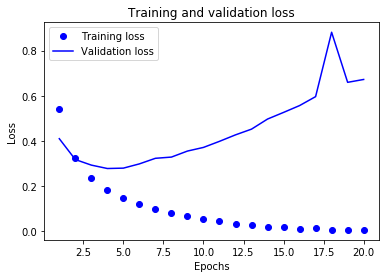

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
history_dict.keys()

['loss', 'val_accuracy', 'val_loss', 'accuracy']

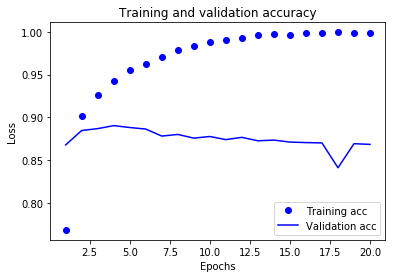

In [18]:
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
from keras.datasets import reuters

(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)



2121728/2110848 [==============================] - 0s 0us/step


In [20]:
print(len(reuters_train_data))
print(len(reuters_test_data))

8982
2246


In [23]:
reuters_train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [25]:
reuters_x_train = vectorize_sequence(reuters_train_data)
reuters_x_test = vectorize_sequence(reuters_test_data)

In [27]:
def to_one_hot(labels, dimension=64):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_reuters_labels = to_one_hot(reuters_train_labels)
on_hot_test_reuters_labels = to_one_hot(reuters_test_labels)

In [ ]:
reuters_model = models.Sequential()
reuters_model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
